In [9]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from yahooquery import Ticker

In [10]:
def time_shift_corr(df, delay):
    df_result = df.copy()
    df_result['date1'] = df_result['date'].apply(lambda x: x + datetime.timedelta(delay))
    df_result = df_result.merge(right=df_result, left_on='date', right_on='date1', suffixes=["", "_y"])
    c = df_result.corr(method='pearson')
    return c

def calc_change_percentage(df):
    df['date1'] = df['date'].apply(lambda x: x - datetime.timedelta(1))
    df_result = df.merge(right=df, left_on=['symbol', 'date'], right_on=['symbol', 'date1'], suffixes=["", "_y"])
    df_result['change_pct'] = (df_result['close_y'] - df_result['close']) / df_result['close']
    return df_result

In [30]:
def download_history(download_list, ndays=60, interval="30m"):
    tc = Ticker(download_list)
    df = tc.history(period=f'{ndays}d', interval=interval)
    return df

symbols_list = ['AMZN', 'WMT', 'INTC', 'DIS'] # 'AAPL', 'GOOGL',  'FB',
# symbols_list = ['TSLA34.SA', 'FBOK34.SA', 'MSFT34.SA', 'AAPL34.SA', 'NVDC34.SA', 'AMZO34.SA', 'GOGL34.SA', 'NFLX34.SA', 'U1BE34.SA', 'MSCD34.SA']
df1d = download_history(symbols_list, ndays=60, interval="1d")
# df1h = download_history(symbols_list, ndays=60, interval="1h")

#### Organizar os dados

In [31]:
dfs = df1d
df = dfs.reset_index()
df = df[['date', 'close', 'symbol']]
df = calc_change_percentage(df)
df_pivot = df.pivot('date', 'symbol', 'change_pct').reset_index()

#### Calcular a Correlação

In [32]:
# corr_df = df_pivot.corr(method='pearson')
# corr_df.head(10)

In [33]:
l=[time_shift_corr(df_pivot, n) for n in range(0,4)]
group=pd.concat(l,keys=range(len(l))).groupby(level=1)

maxdf=group.max()
mindf=group.min()
idmax = group.idxmax(axis=0)
idmin = group.idxmin(axis=0)

In [34]:
# for i in l:
#     print(i.loc['DIS_y', 'AAPL'])

#### Plotar heatmap

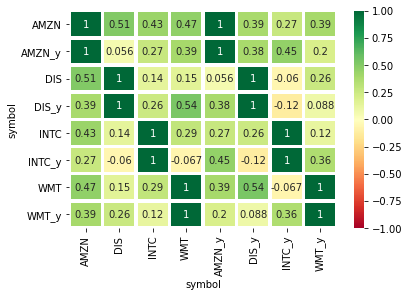

In [38]:
# mask = np.zeros_like(maxdf)
# mask[np.triu_indices_from(mask)] = True
#generate plot
sns.heatmap(maxdf, cmap='RdYlGn', annot=True, vmax=1.0, vmin=-1.0 , linewidths=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

#### Plotar grafico de linhas

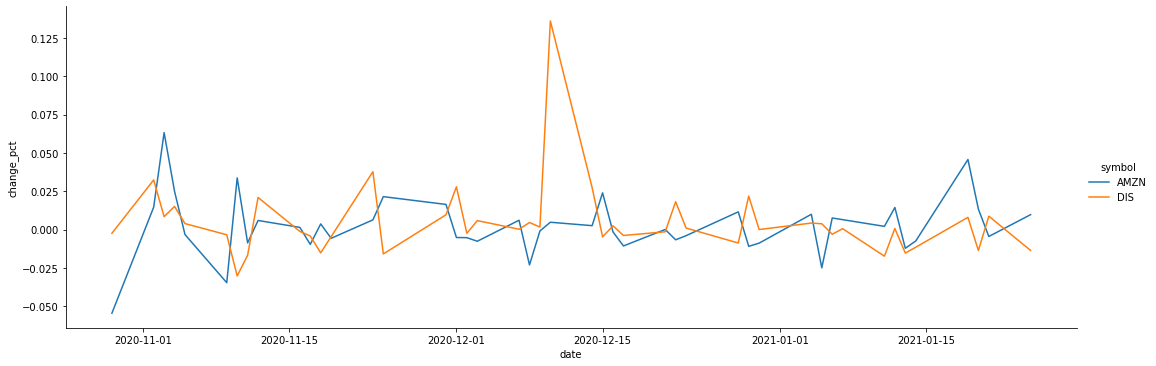

In [37]:
df_wa = df.loc[df['symbol'].isin(['DIS', 'AMZN'])]
sns.relplot(data=df_wa, kind='line', aspect=3, x='date', y='change_pct', hue='symbol')
